In [2]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [3]:
sys.path.insert(0,"/mnt/lanlep2019/src/main")

In [4]:
!ln -s /mnt/lanlep2019 ~/

In [5]:
os.chdir("/mnt/lanlep2019/")

In [6]:
!pwd

/mnt/lanlep2019


# once

In [7]:
!pip install hyperopt


    100% |████████████████████████████████| 122kB 3.4MB/s ta 0:00:01
    100% |████████████████████████████████| 829kB 1.7MB/s eta 0:00:011
    100% |████████████████████████████████| 1.7MB 881kB/s  eta 0:00:01
    100% |████████████████████████████████| 419kB 3.4MB/s  eta 0:00:01
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
Successfully built future networkx
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# data

In [8]:
import xgboost as xgb

In [9]:
import data
import config

In [10]:
reload (data)

<module 'data' from '/mnt/lanlep2019/src/main/data.pyc'>

In [11]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle','signal','kaggle2'] +['fwv','fwvext']+['fwvsoftmax','fwvdis','fwvdis2','fwvcos']+\
        ['fwvextsoftmax','fwvextdis','fwvextdis2','fwvextcos'] + ['fwvwholereg', 'fwvextwholereg']
    traintest = data.TrainTest('dense', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [12]:
traintest.num_dataset()

5

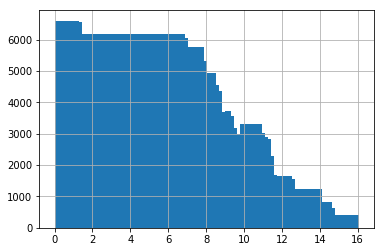

In [13]:
traintest.ydf.hist(bins=100);

In [14]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.02918898210172

In [15]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 450)

In [16]:
datadf=traintest.traindf
datadf.head()

mean        std    max    min  mean_change_abs  \
index                                                                      
quake_03_0200_105000  4.364120   6.262442  119.0 -119.0         0.000000   
quake_06_0120_099000  4.220713  10.566183  328.0 -282.0         0.000007   
quake_07_0296_013500  4.430427   7.501472  159.0 -116.0        -0.000007   
quake_03_0090_034500  4.798247   4.658487  108.0  -76.0         0.000013   
quake_08_0137_055500  4.691327   5.605683  172.0 -171.0        -0.000007   

                      mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                       
quake_03_0200_105000      75149.867188    119.0      0.0         4.398645   
quake_06_0120_099000      75124.750000    328.0      0.0         4.937372   
quake_07_0296_013500      74910.898438    159.0      0.0         7.806824   
quake_03_0090_034500      74906.742188    108.0      0.0         5.020636   
quake_08_0137_055500      74864.296875    172.0      0.0         7.771729   

                      std_last_50000       ...         fwvextdis_pca10_2  \
index                                      ...                             
quake_03_0200_105000        7.115628       ...                 -0.867152   
quake_06_0120_099000       17.188982       ...                  0.599042   
quake_07_0296_013500        8.044850       ...                  0.276776   
quake_03_0090_034500        4.439272       ...                 -1.211162   
quake_08_0137_055500        4.222545       ...                 -1.418130   

                      fwvextdis_pca10_3  fwvextdis_pca10_4  fwvextdis_pca10_5  \
index                                                                           
quake_03_0200_105000           0.251729           0.083587           0.029462   
quake_06_0120_099000          -0.058171          -0.059255           0.019930   
quake_07_0296_013500          -0.041059           0.105883           0.042710   
quake_03_0090_034500           0.021516          -0.055162           0.053457   
quake_08_0137_055500          -0.099060          -0.037935          -0.052247   

                      fwvextdis_pca10_6  fwvextdis_pca10_7  fwvextdis_pca10_8  \
index                                                                           
quake_03_0200_105000          -0.022975          -0.039655           0.000274   
quake_06_0120_099000           0.002073           0.007824          -0.008991   
quake_07_0296_013500          -0.009792          -0.018473           0.035101   
quake_03_0090_034500          -0.030760          -0.066036           0.022193   
quake_08_0137_055500           0.054380          -0.019536           0.042780   

                      fwvextdis_pca10_9  fwv_wholereg  fwvext_wholereg  
index                                                                   
quake_03_0200_105000           0.028007     93.940635        -6.822180  
quake_06_0120_099000           0.020008     20.000997       -12.672698  
quake_07_0296_013500          -0.005669     37.947210       -38.633617  
quake_03_0090_034500           0.016614     80.679887        11.746026  
quake_08_0137_055500           0.010705     53.077711         4.727631  

[5 rows x 450 columns]

In [17]:
ydf=traintest.ydf
ydf.head()

index
quake_03_0200_105000    0.998098
quake_06_0120_099000    2.318898
quake_07_0296_013500    4.532197
quake_03_0090_034500    5.302996
quake_08_0137_055500    2.514399
Name: y, dtype: float64

In [18]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                      
quake_03_0200_105000      3
quake_06_0120_099000      6
quake_07_0296_013500      7
quake_03_0090_034500      3
quake_08_0137_055500      8

In [19]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3672  29520  36295  22631  32480  20574  18018  41240  20192  24635   

          10     11     12     13     14     15    16  
index  29228  28196  22560  21885  37761  24179  4674

In [20]:
qdf.shape,ydf.shape,datadf.shape

((417740, 1), (417740,), (417740, 450))

In [21]:
quakes=range(1,16)
quakes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [22]:
idx=qdf['index'].isin(set(quakes)).values
ydf=ydf[idx]
qdf=qdf[idx]
datadf=datadf[idx]

In [23]:
qdf.shape,ydf.shape,datadf.shape

((409394, 1), (409394,), (409394, 450))

In [24]:
quake_duration= config.quake_length
quake_duration

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [25]:
for qno in quakes:
    r=11/quake_duration[qno]
    print qno, r
    ydf.loc[qdf['index']==qno] *= r

1 0.95315945708
2 0.775729341475
3 1.24206161605
4 0.866559439558
5 1.36559513534
6 1.55823973948
7 0.682932873379
8 1.39132294542
9 1.14141319496
10 0.962655553957
11 0.997772723575
12 1.24595331338
13 1.28417844373
14 0.745684873558
15 1.16285240767


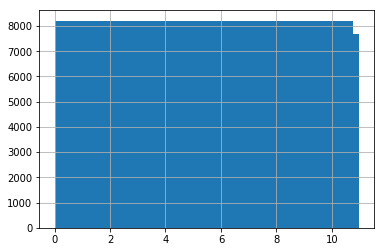

In [26]:
ydf.hist(bins=50);

In [27]:
import utils
n_thread= utils.get_num_thread()
n_thread

35

In [28]:
from hyperopt import fmin, tpe, hp


In [29]:
def train_quake(qno,params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno
    teidx=(qdf['index']==qno).values
    tridx=~qdf['index'].isin({qno,0,16}).values
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx],
    Xtr,ytr,Xte,yte=[u.values for u in [Xtr,ytr,Xte,yte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = xgb.XGBRegressor(n_estimators = 5000, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, 
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae',
                    verbose=100, early_stopping_rounds=100)
    return model.best_score, model.best_iteration

In [30]:
params = { 
          'min_child_weight': 1,
          'objective': 'reg:linear',
          'max_depth': -1,
          'learning_rate': 0.01,
          "gamma": 0,
          "metric": 'mae',
            "tree_method": "hist",
            "max_bin": 256,
          "verbosity": 1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [31]:
best_mae=1e10

In [32]:
def lgbcv(learning_rate, min_child_weight,reg_alpha,reg_lambda,max_depth,subsample,colsample_bytree, gamma,
          max_bin):
    d=locals()
    newparams=params.copy()
    newparams.update(d)    
    newparams['max_depth']=int(max_depth)
    newparams['max_bin']=int(max_bin)
    scores=[]
    validScores={}
    for qno in quakes:
        s=train_quake(qno,newparams,n_thread)
        print "quake ", qno,s
        validScores[qno]=s
        scores.append(s[0])
    r=np.mean(scores)
    global best_mae
    if best_mae>r: best_mae=r
    print "mean score", r
    return r

In [33]:
space={
   'min_child_weight': hp.uniform('min_child_weight', 0.5,3 ),
    'reg_alpha':hp.loguniform('reg_alpha', np.log(0.01),np.log(10) ),
    'reg_lambda':hp.loguniform('reg_lambda', np.log(0.01),np.log(10) ),
    'max_depth':hp.uniform('max_depth',  3,10 ),
    'subsample':hp.uniform('subsample',  0.3,1 ),
    'colsample_bytree':hp.uniform('colsample_bytree',  0.3,1 ),
    'max_bin':hp.loguniform('max_bin', np.log(32),np.log(256) ),
    'gamma':hp.loguniform('gamma', np.log(1e-5),np.log(3) ),
    'learning_rate':hp.loguniform('learning_rate', np.log(0.01),np.log(0.1) ),
}

In [34]:
def objective(args):
    print args
    return lgbcv(**args)



In [35]:
best = fmin(fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100)
print best

{'reg_alpha': 0.017120102170589832, 'colsample_bytree': 0.3984083545603704, 'learning_rate': 0.015699431545092467, 'min_child_weight': 0.5931888761490945, 'subsample': 0.4746252732676675, 'reg_lambda': 0.03275492853744851, 'max_bin': 83.42162941006347, 'max_depth': 3.3258415393822194, 'gamma': 0.01102465165292917}
valid quake                                          
1                                                    
(379874, 450)                                        
(379874,)                                            
(29520, 450)                                         
(29520,)                                             
[0]	validation_0-mae:4.93031	validation_1-mae:4.92962

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.

[100]	validation_0-mae:1.63966	validation_1-mae:1.76347

[200]	validation_0-mae:1.17455	validation_1-mae:1.29744

[300]	validation_0-mae:1.11016	

(20192, 450)                                         
(20192,)                                             
[0]	validation_0-mae:4.93102	validation_1-mae:4.90653

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.

[100]	validation_0-mae:1.64406	validation_1-mae:1.26567

[200]	validation_0-mae:1.17577	validation_1-mae:1.19903

Stopping. Best iteration:                            
[149]	validation_0-mae:1.30244	validation_1-mae:1.15766


quake                                                
8                                                    
(1.157664, 149)                                      
valid quake                                          
9                                                    
(384759, 450)                                        
(384759,)                                            
(24635, 450)                                         
(24635,)           

[100]	validation_0-mae:1.63978	validation_1-mae:1.62599

[200]	validation_0-mae:1.1837	validation_1-mae:1.13104

[300]	validation_0-mae:1.11866	validation_1-mae:1.10875

Stopping. Best iteration:                            
[272]	validation_0-mae:1.12871	validation_1-mae:1.10754


quake                                                
15                                                   
(1.10754, 272)                                       
mean score                                           
1.1528616666666665                                   
{'reg_alpha': 0.12059669578171199, 'colsample_bytree': 0.6341523133493083, 'learning_rate': 0.0504151293976142, 'min_child_weight': 2.6370889939905178, 'subsample': 0.9151082492975171, 'reg_lambda': 5.2503541134063205, 'max_bin': 78.52735551780923, 'max_depth': 9.776185712838945, 'gamma': 0.00040492218085740327}
valid quake                                                                  
1                                                       

valid quake                                                                  
7                                                                            
(368154, 450)                                                                
(368154,)                                                                    
(41240, 450)                                                                 
(41240,)                                                                     
[0]	validation_0-mae:4.75908	validation_1-mae:4.79673                        

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.             

[100]	validation_0-mae:0.532923	validation_1-mae:1.4264                      

[200]	validation_0-mae:0.358556	validation_1-mae:1.41987                     

Stopping. Best iteration:                                                    
[144]	validation_0-mae:0.441936	validation_1

Stopping. Best iteration:                                                    
[54]	validation_0-mae:0.810322	validation_1-mae:1.01924


quake                                                                        
13                                                                           
(1.019238, 54)                                                               
valid quake                                                                  
14                                                                           
(371633, 450)                                                                
(371633,)                                                                    
(37761, 450)                                                                 
(37761,)                                                                     
[0]	validation_0-mae:4.75934	validation_1-mae:4.81151                        

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early s

valid quake                                                                  
5                                                                            
(388820, 450)                                                                
(388820,)                                                                    
(20574, 450)                                                                 
(20574,)                                                                     
[0]	validation_0-mae:4.75653	validation_1-mae:4.70646                        

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.             

[100]	validation_0-mae:1.05218	validation_1-mae:1.31708                      

Stopping. Best iteration:                                                    
[45]	validation_0-mae:1.22818	validation_1-mae:1.19424


quake                                                             

Will train until validation_1-mae hasn't improved in 100 rounds.             

[100]	validation_0-mae:1.06649	validation_1-mae:1.0762                       

[200]	validation_0-mae:1.00141	validation_1-mae:1.064                        

[300]	validation_0-mae:0.949702	validation_1-mae:1.07311                     

Stopping. Best iteration:                                                    
[200]	validation_0-mae:1.00141	validation_1-mae:1.064


quake                                                                        
11                                                                           
(1.063998, 200)                                                              
valid quake                                                                  
12                                                                           
(386834, 450)                                                                
(386834,)                                                                    
(225

[400]	validation_0-mae:1.01402	validation_1-mae:1.36712                      

Stopping. Best iteration:                                                    
[342]	validation_0-mae:1.02654	validation_1-mae:1.3661


quake                                                                        
2                                                                            
(1.366098, 342)                                                              
valid quake                                                                  
3                                                                            
(386763, 450)                                                                
(386763,)                                                                    
(22631, 450)                                                                 
(22631,)                                                                     
[0]	validation_0-mae:4.82019	validation_1-mae:4.80798                        

Multi

(384759, 450)                                                                
(384759,)                                                                    
(24635, 450)                                                                 
(24635,)                                                                     
[0]	validation_0-mae:4.82005	validation_1-mae:4.81336                        

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.             

[100]	validation_0-mae:1.14798	validation_1-mae:0.968778                     

[200]	validation_0-mae:1.09597	validation_1-mae:0.957815                     

Stopping. Best iteration:                                                    
[146]	validation_0-mae:1.11535	validation_1-mae:0.955002


quake                                                                        
9                                                              

(385215,)                                                                    
(24179, 450)                                                                 
(24179,)                                                                     
[0]	validation_0-mae:4.81948	validation_1-mae:4.80268                        

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.             

[100]	validation_0-mae:1.13417	validation_1-mae:1.11426                      

[200]	validation_0-mae:1.08205	validation_1-mae:1.13779                      

Stopping. Best iteration:                                                    
[117]	validation_0-mae:1.11806	validation_1-mae:1.11031


quake                                                                        
15                                                                           
(1.110314, 117)                                                 

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.             

[100]	validation_0-mae:0.779901	validation_1-mae:1.35391                     

Stopping. Best iteration:                                                    
[62]	validation_0-mae:0.886902	validation_1-mae:1.33852


quake                                                                        
6                                                                            
(1.338516, 62)                                                               
valid quake                                                                  
7                                                                            
(368154, 450)                                                                
(368154,)                                                                    
(41240, 450)                                                      

(387509,)                                                                    
(21885, 450)                                                                 
(21885,)                                                                     
[0]	validation_0-mae:4.72924	validation_1-mae:4.70131                        

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.             

[100]	validation_0-mae:0.790448	validation_1-mae:1.05939                     

Stopping. Best iteration:                                                    
[48]	validation_0-mae:0.982402	validation_1-mae:1.01586


quake                                                                        
13                                                                           
(1.015864, 48)                                                               
valid quake                                                      

(32480, 450)                                                                 
(32480,)                                                                     
[0]	validation_0-mae:4.89867	validation_1-mae:4.91465                        

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.             

[100]	validation_0-mae:0.992275	validation_1-mae:1.46687                     

[200]	validation_0-mae:0.617578	validation_1-mae:1.16682                       

[300]	validation_0-mae:0.503631	validation_1-mae:1.145                         

[400]	validation_0-mae:0.421395	validation_1-mae:1.14562                       

Stopping. Best iteration:                                                      
[308]	validation_0-mae:0.49626	validation_1-mae:1.1441


quake                                                                          
4                                                    

(29228, 450)                                                                   
(29228,)                                                                       
[0]	validation_0-mae:4.89842	validation_1-mae:4.90739                          

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.               

[100]	validation_0-mae:0.996242	validation_1-mae:1.36145                       

[200]	validation_0-mae:0.620883	validation_1-mae:1.07136                       

[300]	validation_0-mae:0.507726	validation_1-mae:1.04807                       

[400]	validation_0-mae:0.426993	validation_1-mae:1.04688                       

[500]	validation_0-mae:0.360588	validation_1-mae:1.04726                       

Stopping. Best iteration:                                                      
[434]	validation_0-mae:0.402561	validation_1-mae:1.04608


quake                                   

valid quake                                                               
1                                                                         
(379874, 450)                                                             
(379874,)                                                                 
(29520, 450)                                                              
(29520,)                                                                  
[0]	validation_0-mae:4.71361	validation_1-mae:4.70906                     

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.          

[100]	validation_0-mae:0.959417	validation_1-mae:1.18954                  

[200]	validation_0-mae:0.863986	validation_1-mae:1.19782                  

Stopping. Best iteration:                                                 
[115]	validation_0-mae:0.942666	validation_1-mae:1.18781


quake             

(1.396793, 155)                                                           
valid quake                                                               
8                                                                         
(389202, 450)                                                             
(389202,)                                                                 
(20192, 450)                                                              
(20192,)                                                                  
[0]	validation_0-mae:4.71468	validation_1-mae:4.64157                     

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.          

[100]	validation_0-mae:0.960067	validation_1-mae:1.29618                  

Stopping. Best iteration:                                                 
[34]	validation_0-mae:1.2487	validation_1-mae:1.10363


quake                 

quake                                                                     
14                                                                        
(1.47901, 222)                                                            
valid quake                                                               
15                                                                        
(385215, 450)                                                             
(385215,)                                                                 
(24179, 450)                                                              
(24179,)                                                                  
[0]	validation_0-mae:4.71289	validation_1-mae:4.69646                     

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.          

[100]	validation_0-mae:0.96837	validation_1-mae:1.12243                   

Sto

[100]	validation_0-mae:0.572764	validation_1-mae:1.39817                  

Stopping. Best iteration:                                                 
[35]	validation_0-mae:0.851713	validation_1-mae:1.36759


quake                                                                     
6                                                                         
(1.367589, 35)                                                            
valid quake                                                               
7                                                                         
(368154, 450)                                                             
(368154,)                                                                 
(41240, 450)                                                              
(41240,)                                                                  
[0]	validation_0-mae:4.59296	validation_1-mae:4.64607                     

Multiple eval metrics have been passed: 

quake                                                                     
13                                                                        
(1.023211, 29)                                                            
valid quake                                                               
14                                                                        
(371633, 450)                                                             
(371633,)                                                                 
(37761, 450)                                                              
(37761,)                                                                  
[0]	validation_0-mae:4.59375	validation_1-mae:4.67267                     

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.          

[100]	validation_0-mae:0.55209	validation_1-mae:1.48853                   

Sto

4                                                                         
(376914, 450)                                                             
(376914,)                                                                 
(32480, 450)                                                              
(32480,)                                                                  
[0]	validation_0-mae:4.94882	validation_1-mae:4.9566                      

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.          

[100]	validation_0-mae:2.01993	validation_1-mae:2.21122                   

[200]	validation_0-mae:1.31085	validation_1-mae:1.46004                   

[300]	validation_0-mae:1.15899	validation_1-mae:1.25459                   

[400]	validation_0-mae:1.11962	validation_1-mae:1.19958                   

[500]	validation_0-mae:1.10329	validation_1-mae:1.18347                   


Stopping. Best iteration:                                                 
[429]	validation_0-mae:1.12591	validation_1-mae:0.965369


quake                                                                     
9                                                                         
(0.965369, 429)                                                           
valid quake                                                               
10                                                                        
(380166, 450)                                                             
(380166,)                                                                 
(29228, 450)                                                              
(29228,)                                                                  
[0]	validation_0-mae:4.94901	validation_1-mae:4.95214                     

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until vali

[900]	validation_0-mae:1.03451	validation_1-mae:1.49039                   

[1000]	validation_0-mae:1.02677	validation_1-mae:1.48968                  

[1100]	validation_0-mae:1.01975	validation_1-mae:1.4899                   

Stopping. Best iteration:                                                 
[1043]	validation_0-mae:1.0235	validation_1-mae:1.48857


quake                                                                     
14                                                                        
(1.488572, 1043)                                                          
valid quake                                                               
15                                                                        
(385215, 450)                                                             
(385215,)                                                                 
(24179, 450)                                                              
(24179,)                               

quake                                                                     
5                                                                         
(1.17935, 36)                                                             
valid quake                                                               
6                                                                         
(391376, 450)                                                             
(391376,)                                                                 
(18018, 450)                                                              
(18018,)                                                                  
[0]	validation_0-mae:4.71092	validation_1-mae:4.68318                     

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.          

[100]	validation_0-mae:0.655654	validation_1-mae:1.36822                  

Sto

quake                                                                     
12                                                                        
(0.881966, 48)                                                            
valid quake                                                               
13                                                                        
(387509, 450)                                                             
(387509,)                                                                 
(21885, 450)                                                              
(21885,)                                                                  
[0]	validation_0-mae:4.71155	validation_1-mae:4.67952                     

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.          

[100]	validation_0-mae:0.665515	validation_1-mae:1.05876                  

Sto

[0]	validation_0-mae:4.67882	validation_1-mae:4.71689                      

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.           

[100]	validation_0-mae:0.637439	validation_1-mae:1.15118                   

[200]	validation_0-mae:0.435336	validation_1-mae:1.16388                   

Stopping. Best iteration:                                                  
[103]	validation_0-mae:0.628588	validation_1-mae:1.15055


quake                                                                      
4                                                                          
(1.150555, 103)                                                            
valid quake                                                                
5                                                                          
(388820, 450)                                                              
(388820

(28196,)                                                                   
[0]	validation_0-mae:4.67934	validation_1-mae:4.71021                      

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.           

[100]	validation_0-mae:0.632871	validation_1-mae:1.09467                   

Stopping. Best iteration:                                                  
[89]	validation_0-mae:0.662279	validation_1-mae:1.09227


quake                                                                      
11                                                                         
(1.092271, 89)                                                             
valid quake                                                                
12                                                                         
(386834, 450)                                                              
(386834,)

[300]	validation_0-mae:0.669706	validation_1-mae:1.40267                   

[400]	validation_0-mae:0.570277	validation_1-mae:1.36618                   

[500]	validation_0-mae:0.509339	validation_1-mae:1.35445                   

[600]	validation_0-mae:0.464364	validation_1-mae:1.35195                   

[700]	validation_0-mae:0.421294	validation_1-mae:1.35202                   

Stopping. Best iteration:                                                  
[625]	validation_0-mae:0.45352	validation_1-mae:1.35147


quake                                                                      
2                                                                          
(1.351471, 625)                                                            
valid quake                                                                
3                                                                          
(386763, 450)                                                              
(386763,)                

(20192,)                                                                   
[0]	validation_0-mae:4.94608	validation_1-mae:4.92666                      

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.           

[100]	validation_0-mae:1.77172	validation_1-mae:1.43217                    

[200]	validation_0-mae:0.921569	validation_1-mae:1.09756                   

Stopping. Best iteration:                                                  
[183]	validation_0-mae:0.997584	validation_1-mae:1.09107


quake                                                                      
8                                                                          
(1.09107, 183)                                                             
valid quake                                                                
9                                                                          
(384759

13                                                                         
(1.01251, 243)                                                             
valid quake                                                                
14                                                                         
(371633, 450)                                                              
(371633,)                                                                  
(37761, 450)                                                               
(37761,)                                                                   
[0]	validation_0-mae:4.94493	validation_1-mae:4.96159                      

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.           

[100]	validation_0-mae:1.75986	validation_1-mae:2.43051                    

[200]	validation_0-mae:0.900651	validation_1-mae:1.74881           

4                                                                                
(376914, 450)                                                                    
(376914,)                                                                        
(32480, 450)                                                                     
(32480,)                                                                         
[0]	validation_0-mae:4.92671	validation_1-mae:4.93633                            

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                 

[100]	validation_0-mae:1.58949	validation_1-mae:1.77806                          

[200]	validation_0-mae:1.168	validation_1-mae:1.27458                            

[300]	validation_0-mae:1.11105	validation_1-mae:1.19612                          

[400]	validation_0-mae:1.09083	validation_1-mae:1.1831                           

[300]	validation_0-mae:1.12469	validation_1-mae:0.960974                         

[400]	validation_0-mae:1.10392	validation_1-mae:0.958979                         

[500]	validation_0-mae:1.08921	validation_1-mae:0.959938                         

Stopping. Best iteration:                                                        
[431]	validation_0-mae:1.09887	validation_1-mae:0.957714


quake                                                                            
9                                                                                
(0.957714, 431)                                                                  
valid quake                                                                      
10                                                                               
(380166, 450)                                                                    
(380166,)                                                                        
(29228, 450)                        

[100]	validation_0-mae:1.57011	validation_1-mae:2.12201                          

[200]	validation_0-mae:1.13922	validation_1-mae:1.61287                          

[300]	validation_0-mae:1.07929	validation_1-mae:1.51611                          

[400]	validation_0-mae:1.0593	validation_1-mae:1.49477                           

[500]	validation_0-mae:1.0456	validation_1-mae:1.49073                           

[600]	validation_0-mae:1.03339	validation_1-mae:1.48663                          

[700]	validation_0-mae:1.02246	validation_1-mae:1.48467                          

[800]	validation_0-mae:1.0124	validation_1-mae:1.48342                           

Stopping. Best iteration:                                                        
[735]	validation_0-mae:1.01887	validation_1-mae:1.48289


quake                                                                            
14                                                                               
(1.482886, 735)                 

4                                                                                
(1.137428, 215)                                                                  
valid quake                                                                      
5                                                                                
(388820, 450)                                                                    
(388820,)                                                                        
(20574, 450)                                                                     
(20574,)                                                                         
[0]	validation_0-mae:4.82928	validation_1-mae:4.79669                            

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                 

[100]	validation_0-mae:0.876387	validation_1-mae:1.26486                         

S

(381198, 450)                                                                    
(381198,)                                                                        
(28196, 450)                                                                     
(28196,)                                                                         
[0]	validation_0-mae:4.82903	validation_1-mae:4.84459                            

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                 

[100]	validation_0-mae:0.882649	validation_1-mae:1.12056                         

[200]	validation_0-mae:0.73281	validation_1-mae:1.07322                          

[300]	validation_0-mae:0.632466	validation_1-mae:1.079                           

Stopping. Best iteration:                                                        
[200]	validation_0-mae:0.73281	validation_1-mae:1.07322


quake                  

[900]	validation_0-mae:1.04567	validation_1-mae:1.18475                          

Stopping. Best iteration:                                                        
[805]	validation_0-mae:1.05378	validation_1-mae:1.18417


quake                                                                            
1                                                                                
(1.184173, 805)                                                                  
valid quake                                                                      
2                                                                                
(373099, 450)                                                                    
(373099,)                                                                        
(36295, 450)                                                                     
(36295,)                                                                         
[0]	validation_0-mae:4.94361	validation

quake                                                                            
6                                                                                
(1.337895, 246)                                                                  
valid quake                                                                      
7                                                                                
(368154, 450)                                                                    
(368154,)                                                                        
(41240, 450)                                                                     
(41240,)                                                                         
[0]	validation_0-mae:4.9432	validation_1-mae:4.95674                             

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                 

[1

[400]	validation_0-mae:1.11241	validation_1-mae:1.08238                          

[500]	validation_0-mae:1.09777	validation_1-mae:1.07061                          

[600]	validation_0-mae:1.08684	validation_1-mae:1.06553                          

[700]	validation_0-mae:1.07673	validation_1-mae:1.06366                          

[800]	validation_0-mae:1.0679	validation_1-mae:1.06231                           

[900]	validation_0-mae:1.05964	validation_1-mae:1.06208                          

Stopping. Best iteration:                                                        
[883]	validation_0-mae:1.06097	validation_1-mae:1.06182


quake                                                                            
11                                                                               
(1.061822, 883)                                                                  
valid quake                                                                      
12                                

[0]	validation_0-mae:4.86765	validation_1-mae:4.86905                            

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                 

[100]	validation_0-mae:0.875824	validation_1-mae:1.31055                         

[200]	validation_0-mae:0.650166	validation_1-mae:1.20224                         

[300]	validation_0-mae:0.550053	validation_1-mae:1.20371                         

Stopping. Best iteration:                                                        
[233]	validation_0-mae:0.614608	validation_1-mae:1.20017


quake                                                                            
1                                                                                
(1.200168, 233)                                                                  
valid quake                                                                      
2                     

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                 

[100]	validation_0-mae:0.854545	validation_1-mae:1.50921                         

[200]	validation_0-mae:0.63039	validation_1-mae:1.40809                          

[300]	validation_0-mae:0.530136	validation_1-mae:1.40496                         

Stopping. Best iteration:                                                        
[232]	validation_0-mae:0.593391	validation_1-mae:1.40416


quake                                                                            
7                                                                                
(1.404155, 232)                                                                  
valid quake                                                                      
8                                                                                
(389202, 450)          

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                 

[100]	validation_0-mae:0.88829	validation_1-mae:1.02936                          

Stopping. Best iteration:                                                        
[94]	validation_0-mae:0.921787	validation_1-mae:1.02788


quake                                                                            
13                                                                               
(1.02788, 94)                                                                    
valid quake                                                                      
14                                                                               
(371633, 450)                                                                    
(371633,)                                                                        
(37761, 450)              

[200]	validation_0-mae:1.26014	validation_1-mae:0.958862                         

[300]	validation_0-mae:1.07398	validation_1-mae:0.804076                         

[400]	validation_0-mae:1.01866	validation_1-mae:0.813363                         

Stopping. Best iteration:                                                        
[318]	validation_0-mae:1.05965	validation_1-mae:0.802964


quake                                                                            
3                                                                                
(0.802964, 318)                                                                  
valid quake                                                                      
4                                                                                
(376914, 450)                                                                    
(376914,)                                                                        
(32480, 450)                        

Stopping. Best iteration:                                                        
[200]	validation_0-mae:1.24154	validation_1-mae:1.10781


quake                                                                            
8                                                                                
(1.107812, 200)                                                                  
valid quake                                                                      
9                                                                                
(384759, 450)                                                                    
(384759,)                                                                        
(24635, 450)                                                                     
(24635,)                                                                         
[0]	validation_0-mae:4.95105	validation_1-mae:4.94786                            

Multiple eval metrics have been passed:

(387509, 450)                                                                    
(387509,)                                                                        
(21885, 450)                                                                     
(21885,)                                                                         
[0]	validation_0-mae:4.95114	validation_1-mae:4.94112                            

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                 

[100]	validation_0-mae:2.02942	validation_1-mae:1.73249                          

[200]	validation_0-mae:1.25288	validation_1-mae:1.03817                          

[300]	validation_0-mae:1.0638	validation_1-mae:1.02455                           

Stopping. Best iteration:                                                        
[246]	validation_0-mae:1.13418	validation_1-mae:1.01954


quake                  

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                 

[100]	validation_0-mae:1.01508	validation_1-mae:0.821397                         

Stopping. Best iteration:                                                        
[76]	validation_0-mae:1.06263	validation_1-mae:0.810383


quake                                                                            
3                                                                                
(0.810383, 76)                                                                   
valid quake                                                                      
4                                                                                
(376914, 450)                                                                    
(376914,)                                                                        
(32480, 450)              

(0.93526, 174)                                                                   
valid quake                                                                      
10                                                                               
(380166, 450)                                                                    
(380166,)                                                                        
(29228, 450)                                                                     
(29228,)                                                                         
[0]	validation_0-mae:4.79028	validation_1-mae:4.80027                            

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                 

[100]	validation_0-mae:1.00668	validation_1-mae:1.08039                          

[200]	validation_0-mae:0.922828	validation_1-mae:1.05208                         



valid quake                                                                      
1                                                                                
(379874, 450)                                                                    
(379874,)                                                                        
(29520, 450)                                                                     
(29520,)                                                                         
[0]	validation_0-mae:4.65546	validation_1-mae:4.65602                            

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                 

[100]	validation_0-mae:0.482572	validation_1-mae:1.20791                         

Stopping. Best iteration:                                                        
[74]	validation_0-mae:0.560759	validation_1-mae:1.20357


quake                    

[100]	validation_0-mae:0.468394	validation_1-mae:1.4114                          

Stopping. Best iteration:                                                        
[91]	validation_0-mae:0.493471	validation_1-mae:1.40977


quake                                                                            
7                                                                                
(1.409766, 91)                                                                   
valid quake                                                                      
8                                                                                
(389202, 450)                                                                    
(389202,)                                                                        
(20192, 450)                                                                     
(20192,)                                                                         
[0]	validation_0-mae:4.6555	validation_

(37761, 450)                                                                     
(37761,)                                                                         
[0]	validation_0-mae:4.65371	validation_1-mae:4.72685                            

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                 

[100]	validation_0-mae:0.466529	validation_1-mae:1.49865                         

Stopping. Best iteration:                                                        
[99]	validation_0-mae:0.470243	validation_1-mae:1.49691


quake                                                                            
14                                                                               
(1.496915, 99)                                                                   
valid quake                                                                      
15                       

(388820, 450)                                                                    
(388820,)                                                                        
(20574, 450)                                                                     
(20574,)                                                                         
[0]	validation_0-mae:4.8376	validation_1-mae:4.80731                             

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                 

[100]	validation_0-mae:0.816552	validation_1-mae:1.25588                         

Stopping. Best iteration:                                                        
[65]	validation_0-mae:1.04427	validation_1-mae:1.17891


quake                                                                            
5                                                                                
(1.178914, 65)            

[0]	validation_0-mae:4.83652	validation_1-mae:4.85119                            

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                 

[100]	validation_0-mae:0.821715	validation_1-mae:1.1389                          

[200]	validation_0-mae:0.637515	validation_1-mae:1.07448                         

Stopping. Best iteration:                                                        
[183]	validation_0-mae:0.658982	validation_1-mae:1.07328


quake                                                                            
11                                                                               
(1.073282, 183)                                                                  
valid quake                                                                      
12                                                                               
(386834, 450)          

(36295,)                                                                         
[0]	validation_0-mae:4.87374	validation_1-mae:4.89173                            

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                 

[100]	validation_0-mae:0.979057	validation_1-mae:1.49258                         

[200]	validation_0-mae:0.774778	validation_1-mae:1.36305                         

[300]	validation_0-mae:0.693374	validation_1-mae:1.35625                         

[400]	validation_0-mae:0.62174	validation_1-mae:1.35793                          

Stopping. Best iteration:                                                        
[338]	validation_0-mae:0.663	validation_1-mae:1.35513


quake                                                                            
2                                                                                
(1.355135, 338)         

[0]	validation_0-mae:4.87488	validation_1-mae:4.8389                             

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                 

[100]	validation_0-mae:0.994146	validation_1-mae:1.12143                         

Stopping. Best iteration:                                                        
[79]	validation_0-mae:1.14593	validation_1-mae:1.0898


quake                                                                            
8                                                                                
(1.0898, 79)                                                                     
valid quake                                                                      
9                                                                                
(384759, 450)                                                                    
(384759,)                  

(37761, 450)                                                                     
(37761,)                                                                         
[0]	validation_0-mae:4.87364	validation_1-mae:4.90299                            

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                 

[100]	validation_0-mae:0.97143	validation_1-mae:1.67035                          

[200]	validation_0-mae:0.765084	validation_1-mae:1.49223                         

[300]	validation_0-mae:0.688098	validation_1-mae:1.48208                         

[400]	validation_0-mae:0.619781	validation_1-mae:1.48263                         

Stopping. Best iteration:                                                        
[311]	validation_0-mae:0.680352	validation_1-mae:1.48092


quake                                                                            
14                   

(1.140703, 292)                                                              
valid quake                                                                  
5                                                                            
(388820, 450)                                                                
(388820,)                                                                    
(20574, 450)                                                                 
(20574,)                                                                     
[0]	validation_0-mae:4.88566	validation_1-mae:4.86119                        

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.             

[100]	validation_0-mae:1.10743	validation_1-mae:1.18314                      

Stopping. Best iteration:                                                    
[94]	validation_0-mae:1.14471	validation_1-ma

11                                                                           
(381198, 450)                                                                
(381198,)                                                                    
(28196, 450)                                                                 
(28196,)                                                                     
[0]	validation_0-mae:4.88543	validation_1-mae:4.89527                        

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.             

[100]	validation_0-mae:1.11485	validation_1-mae:1.2907                       

[200]	validation_0-mae:0.913721	validation_1-mae:1.07164                     

[300]	validation_0-mae:0.84922	validation_1-mae:1.06019                      

Stopping. Best iteration:                                                    
[284]	validation_0-mae:0.858112	validation_

valid quake                                                                 
2                                                                           
(373099, 450)                                                               
(373099,)                                                                   
(36295, 450)                                                                
(36295,)                                                                    
[0]	validation_0-mae:4.90953	validation_1-mae:4.92373                       

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.            

[100]	validation_0-mae:1.22066	validation_1-mae:1.67725                     

[200]	validation_0-mae:0.852156	validation_1-mae:1.39077                    

[300]	validation_0-mae:0.765033	validation_1-mae:1.35646                    

[400]	validation_0-mae:0.705897	validation_1-mae:1.351

(389202, 450)                                                               
(389202,)                                                                   
(20192, 450)                                                                
(20192,)                                                                    
[0]	validation_0-mae:4.91058	validation_1-mae:4.88328                       

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.            

[100]	validation_0-mae:1.23306	validation_1-mae:1.10102                     

[200]	validation_0-mae:0.864884	validation_1-mae:1.23179                    

Stopping. Best iteration:                                                   
[112]	validation_0-mae:1.13732	validation_1-mae:1.09204


quake                                                                       
8                                                                         

(37761, 450)                                                                
(37761,)                                                                    
[0]	validation_0-mae:4.90939	validation_1-mae:4.93208                       

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.            

[100]	validation_0-mae:1.21361	validation_1-mae:1.89983                     

[200]	validation_0-mae:0.842266	validation_1-mae:1.53687                    

[300]	validation_0-mae:0.756679	validation_1-mae:1.4912                     

[400]	validation_0-mae:0.698591	validation_1-mae:1.48621                    

Stopping. Best iteration:                                                   
[385]	validation_0-mae:0.707406	validation_1-mae:1.48603


quake                                                                       
14                                                                     

[400]	validation_0-mae:0.835649	validation_1-mae:1.15083                        

[500]	validation_0-mae:0.792175	validation_1-mae:1.15104                        

Stopping. Best iteration:                                                       
[439]	validation_0-mae:0.817845	validation_1-mae:1.15037


quake                                                                           
4                                                                               
(1.150373, 439)                                                                 
valid quake                                                                     
5                                                                               
(388820, 450)                                                                   
(388820,)                                                                       
(20574, 450)                                                                    
(20574,)                                        

Will train until validation_1-mae hasn't improved in 100 rounds.                

[100]	validation_0-mae:1.27731	validation_1-mae:1.45924                         

[200]	validation_0-mae:0.955856	validation_1-mae:1.09667                        

[300]	validation_0-mae:0.890882	validation_1-mae:1.0604                         

[400]	validation_0-mae:0.84276	validation_1-mae:1.05362                         

[500]	validation_0-mae:0.798204	validation_1-mae:1.05026                        

[600]	validation_0-mae:0.757836	validation_1-mae:1.04992                        

[700]	validation_0-mae:0.720959	validation_1-mae:1.05048                        

Stopping. Best iteration:                                                       
[607]	validation_0-mae:0.755501	validation_1-mae:1.04948


quake                                                                           
10                                                                              
(1.049483, 607)                           

1.1312906666666664                                                              
{'reg_alpha': 0.8245043638267195, 'colsample_bytree': 0.725562293476103, 'learning_rate': 0.0257402126709751, 'min_child_weight': 2.072156278083625, 'subsample': 0.8193621805891312, 'reg_lambda': 1.3823820468923962, 'max_bin': 63.10071787479927, 'max_depth': 6.210775278948629, 'gamma': 3.6815124355952035e-05}
valid quake                                                                     
1                                                                               
(379874, 450)                                                                   
(379874,)                                                                       
(29520, 450)                                                                    
(29520,)                                                                        
[0]	validation_0-mae:4.88094	validation_1-mae:4.88093                           

Multiple eval metrics have been passed: 

quake                                                                           
6                                                                               
(1.332117, 119)                                                                 
valid quake                                                                     
7                                                                               
(368154, 450)                                                                   
(368154,)                                                                       
(41240, 450)                                                                    
(41240,)                                                                        
[0]	validation_0-mae:4.88029	validation_1-mae:4.90214                           

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                

[100]	validat

[100]	validation_0-mae:1.10378	validation_1-mae:0.898515                        

[200]	validation_0-mae:0.911241	validation_1-mae:0.919133                       

Stopping. Best iteration:                                                       
[118]	validation_0-mae:1.0311	validation_1-mae:0.879569


quake                                                                           
12                                                                              
(0.879569, 118)                                                                 
valid quake                                                                     
13                                                                              
(387509, 450)                                                                   
(387509,)                                                                       
(21885, 450)                                                                    
(21885,)                                         

3                                                                               
(386763, 450)                                                                   
(386763,)                                                                       
(22631, 450)                                                                    
(22631,)                                                                        
[0]	validation_0-mae:4.91139	validation_1-mae:4.90372                           

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                

[100]	validation_0-mae:1.26604	validation_1-mae:1.06091                         

[200]	validation_0-mae:0.897016	validation_1-mae:0.817864                       

Stopping. Best iteration:                                                       
[181]	validation_0-mae:0.924489	validation_1-mae:0.814149


quake                           

valid quake                                                                     
9                                                                               
(384759, 450)                                                                   
(384759,)                                                                       
(24635, 450)                                                                    
(24635,)                                                                        
[0]	validation_0-mae:4.91145	validation_1-mae:4.90758                           

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                

[100]	validation_0-mae:1.26649	validation_1-mae:1.22329                         

[200]	validation_0-mae:0.898729	validation_1-mae:0.939741                       

[300]	validation_0-mae:0.810516	validation_1-mae:0.929935                       

[400]	vali

[400]	validation_0-mae:0.708033	validation_1-mae:1.47747                        

[500]	validation_0-mae:0.658398	validation_1-mae:1.47795                        

Stopping. Best iteration:                                                       
[422]	validation_0-mae:0.696067	validation_1-mae:1.47656


quake                                                                           
14                                                                              
(1.476557, 422)                                                                 
valid quake                                                                     
15                                                                              
(385215, 450)                                                                   
(385215,)                                                                       
(24179, 450)                                                                    
(24179,)                                        

(20574, 450)                                                                    
(20574,)                                                                        
[0]	validation_0-mae:4.85663	validation_1-mae:4.82741                           

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                

[100]	validation_0-mae:0.941682	validation_1-mae:1.23171                        

Stopping. Best iteration:                                                       
[73]	validation_0-mae:1.11126	validation_1-mae:1.17841


quake                                                                           
5                                                                               
(1.178411, 73)                                                                  
valid quake                                                                     
6                                   

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                

[100]	validation_0-mae:0.947437	validation_1-mae:1.18251                        

[200]	validation_0-mae:0.777845	validation_1-mae:1.07334                        

[300]	validation_0-mae:0.682888	validation_1-mae:1.07405                        

Stopping. Best iteration:                                                       
[219]	validation_0-mae:0.758685	validation_1-mae:1.07059


quake                                                                           
11                                                                              
(1.070592, 219)                                                                 
valid quake                                                                     
12                                                                              
(386834, 450)                    

2                                                                               
(373099, 450)                                                                   
(373099,)                                                                       
(36295, 450)                                                                    
(36295,)                                                                        
[0]	validation_0-mae:4.93249	validation_1-mae:4.94597                           

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                

[100]	validation_0-mae:1.64772	validation_1-mae:1.93643                         

[200]	validation_0-mae:1.13269	validation_1-mae:1.46632                         

[300]	validation_0-mae:1.05436	validation_1-mae:1.3784                          

[400]	validation_0-mae:1.02846	validation_1-mae:1.36035                         

[500]	val

[300]	validation_0-mae:1.05056	validation_1-mae:1.42801                         

[400]	validation_0-mae:1.02306	validation_1-mae:1.41006                         

[500]	validation_0-mae:1.00283	validation_1-mae:1.40691                         

[600]	validation_0-mae:0.986085	validation_1-mae:1.40589                        

[700]	validation_0-mae:0.970486	validation_1-mae:1.40534                        

[800]	validation_0-mae:0.955731	validation_1-mae:1.4054                         

Stopping. Best iteration:                                                       
[704]	validation_0-mae:0.969908	validation_1-mae:1.40493


quake                                                                           
7                                                                               
(1.404926, 704)                                                                 
valid quake                                                                     
8                                           

quake                                                                           
12                                                                              
(0.890011, 223)                                                                 
valid quake                                                                     
13                                                                              
(387509, 450)                                                                   
(387509,)                                                                       
(21885, 450)                                                                    
(21885,)                                                                        
[0]	validation_0-mae:4.93339	validation_1-mae:4.92183                           

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                

[100]	validat

quake                                                                           
2                                                                               
(1.344558, 745)                                                                 
valid quake                                                                     
3                                                                               
(386763, 450)                                                                   
(386763,)                                                                       
(22631, 450)                                                                    
(22631,)                                                                        
[0]	validation_0-mae:4.92918	validation_1-mae:4.92297                           

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                

[100]	validat

[0]	validation_0-mae:4.9297	validation_1-mae:4.90559                            

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                

[100]	validation_0-mae:1.52841	validation_1-mae:1.18804                         

[200]	validation_0-mae:1.01658	validation_1-mae:1.16212                         

Stopping. Best iteration:                                                       
[140]	validation_0-mae:1.20482	validation_1-mae:1.09638


quake                                                                           
8                                                                               
(1.096379, 140)                                                                 
valid quake                                                                     
9                                                                               
(384759, 450)                     

(1.021493, 192)                                                                 
valid quake                                                                     
14                                                                              
(371633, 450)                                                                   
(371633,)                                                                       
(37761, 450)                                                                    
(37761,)                                                                        
[0]	validation_0-mae:4.9286	validation_1-mae:4.9482                             

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                

[100]	validation_0-mae:1.51432	validation_1-mae:2.1273                          

[200]	validation_0-mae:0.995285	validation_1-mae:1.60687                        

[300]	valid

4                                                                               
(376914, 450)                                                                   
(376914,)                                                                       
(32480, 450)                                                                    
(32480,)                                                                        
[0]	validation_0-mae:4.93305	validation_1-mae:4.94237                           

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                

[100]	validation_0-mae:1.59405	validation_1-mae:1.88706                         

[200]	validation_0-mae:1.03892	validation_1-mae:1.28772                         

[300]	validation_0-mae:0.934419	validation_1-mae:1.17719                        

[400]	validation_0-mae:0.890447	validation_1-mae:1.15469                        

[500]	val

[300]	validation_0-mae:0.949433	validation_1-mae:0.93754                        

[400]	validation_0-mae:0.904844	validation_1-mae:0.93241                        

[500]	validation_0-mae:0.870181	validation_1-mae:0.931188                       

[600]	validation_0-mae:0.836911	validation_1-mae:0.930783                       

[700]	validation_0-mae:0.806469	validation_1-mae:0.930524                       

[800]	validation_0-mae:0.776466	validation_1-mae:0.928949                       

[900]	validation_0-mae:0.748571	validation_1-mae:0.928376                       

[1000]	validation_0-mae:0.72323	validation_1-mae:0.927931                       

[1100]	validation_0-mae:0.697616	validation_1-mae:0.925703                      

[1200]	validation_0-mae:0.674712	validation_1-mae:0.92578                       

Stopping. Best iteration:                                                       
[1139]	validation_0-mae:0.688556	validation_1-mae:0.925075


quake                                 

[400]	validation_0-mae:0.863165	validation_1-mae:1.488                          

[500]	validation_0-mae:0.828118	validation_1-mae:1.48333                        

[600]	validation_0-mae:0.796589	validation_1-mae:1.48245                        

Stopping. Best iteration:                                                       
[573]	validation_0-mae:0.804907	validation_1-mae:1.48183


quake                                                                           
14                                                                              
(1.481834, 573)                                                                 
valid quake                                                                     
15                                                                              
(385215, 450)                                                                   
(385215,)                                                                       
(24179, 450)                                   

[300]	validation_0-mae:1.12434	validation_1-mae:1.21121                          

[400]	validation_0-mae:1.10172	validation_1-mae:1.18615                          

[500]	validation_0-mae:1.08959	validation_1-mae:1.1803                           

[600]	validation_0-mae:1.0783	validation_1-mae:1.17924                           

[700]	validation_0-mae:1.06842	validation_1-mae:1.17983                          

Stopping. Best iteration:                                                        
[657]	validation_0-mae:1.07279	validation_1-mae:1.17785


quake                                                                            
4                                                                                
(1.177845, 657)                                                                  
valid quake                                                                      
5                                                                                
(388820, 450)                      

9                                                                                
(0.951812, 496)                                                                  
valid quake                                                                      
10                                                                               
(380166, 450)                                                                    
(380166,)                                                                        
(29228, 450)                                                                     
(29228,)                                                                         
[0]	validation_0-mae:4.93425	validation_1-mae:4.93854                            

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                 

[100]	validation_0-mae:1.71368	validation_1-mae:1.82123                          

[

[100]	validation_0-mae:1.69586	validation_1-mae:2.24167                          

[200]	validation_0-mae:1.1761	validation_1-mae:1.66818                           

[300]	validation_0-mae:1.09442	validation_1-mae:1.53565                          

[400]	validation_0-mae:1.07194	validation_1-mae:1.50394                          

[500]	validation_0-mae:1.05858	validation_1-mae:1.49497                          

[600]	validation_0-mae:1.04747	validation_1-mae:1.49117                          

[700]	validation_0-mae:1.03765	validation_1-mae:1.48863                          

[800]	validation_0-mae:1.02824	validation_1-mae:1.48529                          

[900]	validation_0-mae:1.0201	validation_1-mae:1.48439                           

[1000]	validation_0-mae:1.01181	validation_1-mae:1.48391                         

[1100]	validation_0-mae:1.00431	validation_1-mae:1.48329                         

[1200]	validation_0-mae:0.996806	validation_1-mae:1.48415                        

Stop

(376914, 450)                                                                    
(376914,)                                                                        
(32480, 450)                                                                     
(32480,)                                                                         
[0]	validation_0-mae:4.93792	validation_1-mae:4.94637                            

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                 

[100]	validation_0-mae:1.72012	validation_1-mae:1.97329                          

[200]	validation_0-mae:1.12813	validation_1-mae:1.33257                          

[300]	validation_0-mae:1.02227	validation_1-mae:1.19419                          

[400]	validation_0-mae:0.985949	validation_1-mae:1.16809                         

[500]	validation_0-mae:0.960857	validation_1-mae:1.16112                        

[100]	validation_0-mae:1.73152	validation_1-mae:1.66039                          

[200]	validation_0-mae:1.14473	validation_1-mae:1.00542                          

[300]	validation_0-mae:1.03547	validation_1-mae:0.940901                         

[400]	validation_0-mae:0.997718	validation_1-mae:0.932921                        

[500]	validation_0-mae:0.971935	validation_1-mae:0.931505                        

[600]	validation_0-mae:0.94844	validation_1-mae:0.930047                         

[700]	validation_0-mae:0.92753	validation_1-mae:0.929759                         

[800]	validation_0-mae:0.906661	validation_1-mae:0.929949                        

Stopping. Best iteration:                                                        
[721]	validation_0-mae:0.923071	validation_1-mae:0.929344


quake                                                                            
9                                                                                
(0.929344, 721)               

Will train until validation_1-mae hasn't improved in 100 rounds.                 

[100]	validation_0-mae:1.71096	validation_1-mae:2.28301                          

[200]	validation_0-mae:1.10451	validation_1-mae:1.67264                          

[300]	validation_0-mae:0.992993	validation_1-mae:1.52272                         

[400]	validation_0-mae:0.954922	validation_1-mae:1.48677                         

[500]	validation_0-mae:0.931015	validation_1-mae:1.47832                         

[600]	validation_0-mae:0.908458	validation_1-mae:1.47693                         

[700]	validation_0-mae:0.886501	validation_1-mae:1.47735                         

Stopping. Best iteration:                                                        
[616]	validation_0-mae:0.904469	validation_1-mae:1.47643


quake                                                                            
14                                                                               
(1.476426, 616)                

[200]	validation_0-mae:0.985587	validation_1-mae:1.21987                         

[300]	validation_0-mae:0.910331	validation_1-mae:1.16133                         

[400]	validation_0-mae:0.866468	validation_1-mae:1.15359                         

[500]	validation_0-mae:0.826973	validation_1-mae:1.1536                          

Stopping. Best iteration:                                                        
[444]	validation_0-mae:0.848608	validation_1-mae:1.1523


quake                                                                            
4                                                                                
(1.152301, 444)                                                                  
valid quake                                                                      
5                                                                                
(388820, 450)                                                                    
(388820,)                           

(29228, 450)                                                                     
(29228,)                                                                         
[0]	validation_0-mae:4.91875	validation_1-mae:4.92465                            

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                 

[100]	validation_0-mae:1.38535	validation_1-mae:1.57268                          

[200]	validation_0-mae:0.987404	validation_1-mae:1.12333                         

[300]	validation_0-mae:0.913714	validation_1-mae:1.06819                         

[400]	validation_0-mae:0.870129	validation_1-mae:1.05813                         

[500]	validation_0-mae:0.831509	validation_1-mae:1.05724                         

[600]	validation_0-mae:0.796441	validation_1-mae:1.05531                         

[700]	validation_0-mae:0.762	validation_1-mae:1.05472                         

quake                                                                            
15                                                                               
(1.032267, 188)                                                                  
mean score                                                                       
1.1312075333333333                                                               
{'reg_alpha': 0.21134737416710608, 'colsample_bytree': 0.41876779573569783, 'learning_rate': 0.02251495619962736, 'min_child_weight': 1.2754949001625047, 'subsample': 0.9426010831959271, 'reg_lambda': 0.08707499596160072, 'max_bin': 66.74218764892174, 'max_depth': 4.907251138504829, 'gamma': 0.3774087010702066}
valid quake                                                                      
1                                                                                
(379874, 450)                                                                    
(379874,)                      

(391376,)                                                                        
(18018, 450)                                                                     
(18018,)                                                                         
[0]	validation_0-mae:4.89849	validation_1-mae:4.88128                            

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                 

[100]	validation_0-mae:1.2785	validation_1-mae:1.36854                           

[200]	validation_0-mae:1.06628	validation_1-mae:1.34516                          

Stopping. Best iteration:                                                        
[143]	validation_0-mae:1.1218	validation_1-mae:1.3366


quake                                                                            
6                                                                                
(1.336604, 143)           

[400]	validation_0-mae:1.01679	validation_1-mae:1.06605                          

Stopping. Best iteration:                                                        
[385]	validation_0-mae:1.02059	validation_1-mae:1.06478


quake                                                                            
11                                                                               
(1.064777, 385)                                                                  
valid quake                                                                      
12                                                                               
(386834, 450)                                                                    
(386834,)                                                                        
(22560, 450)                                                                     
(22560,)                                                                         
[0]	validation_0-mae:4.8984	validation_

2                                                                                
(373099, 450)                                                                    
(373099,)                                                                        
(36295, 450)                                                                     
(36295,)                                                                         
[0]	validation_0-mae:4.9196	validation_1-mae:4.93273                             

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                 

[100]	validation_0-mae:1.34018	validation_1-mae:1.76784                          

[200]	validation_0-mae:0.882289	validation_1-mae:1.41131                         

[300]	validation_0-mae:0.782547	validation_1-mae:1.36519                         

[400]	validation_0-mae:0.726719	validation_1-mae:1.35837                         

[500]	validation_0-mae:0.664859	validation_1-mae:1.40522                          

Stopping. Best iteration:                                                         
[413]	validation_0-mae:0.708732	validation_1-mae:1.4041


quake                                                                             
7                                                                                 
(1.404099, 413)                                                                   
valid quake                                                                       
8                                                                                 
(389202, 450)                                                                     
(389202,)                                                                         
(20192, 450)                                                                      
(20192,)                                                                          
[0]	validation_0-mae:4.921	v

12                                                                                
(0.877225, 176)                                                                   
valid quake                                                                       
13                                                                                
(387509, 450)                                                                     
(387509,)                                                                         
(21885, 450)                                                                      
(21885,)                                                                          
[0]	validation_0-mae:4.92033	validation_1-mae:4.90872                             

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                  

[100]	validation_0-mae:1.35947	validation_1-mae:1.11586                   

quake                                                                             
2                                                                                 
(1.3462, 746)                                                                     
valid quake                                                                       
3                                                                                 
(386763, 450)                                                                     
(386763,)                                                                         
(22631, 450)                                                                      
(22631,)                                                                          
[0]	validation_0-mae:4.95414	validation_1-mae:4.94963                             

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.           

(1.408436, 792)                                                                   
valid quake                                                                       
8                                                                                 
(389202, 450)                                                                     
(389202,)                                                                         
(20192, 450)                                                                      
(20192,)                                                                          
[0]	validation_0-mae:4.95452	validation_1-mae:4.93682                             

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                  

[100]	validation_0-mae:2.02263	validation_1-mae:1.6509                            

[200]	validation_0-mae:1.06377	validation_1-mae:1.08933                  

valid quake                                                                       
13                                                                                
(387509, 450)                                                                     
(387509,)                                                                         
(21885, 450)                                                                      
(21885,)                                                                          
[0]	validation_0-mae:4.95426	validation_1-mae:4.94612                             

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                  

[100]	validation_0-mae:2.02381	validation_1-mae:1.8345                            

[200]	validation_0-mae:1.06827	validation_1-mae:1.0409                            

[300]	validation_0-mae:0.758714	validation_1-mae:1.00903                

(386763, 450)                                                                     
(386763,)                                                                         
(22631, 450)                                                                      
(22631,)                                                                          
[0]	validation_0-mae:4.89619	validation_1-mae:4.89023                             

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                  

[100]	validation_0-mae:1.12407	validation_1-mae:0.931667                          

[200]	validation_0-mae:0.841636	validation_1-mae:0.826165                         

Stopping. Best iteration:                                                         
[151]	validation_0-mae:0.917403	validation_1-mae:0.812019


quake                                                                             
3           

(384759, 450)                                                                     
(384759,)                                                                         
(24635, 450)                                                                      
(24635,)                                                                          
[0]	validation_0-mae:4.89615	validation_1-mae:4.89292                             

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                  

[100]	validation_0-mae:1.12544	validation_1-mae:1.08537                           

[200]	validation_0-mae:0.844255	validation_1-mae:0.930763                         

[300]	validation_0-mae:0.760653	validation_1-mae:0.92915                          

[400]	validation_0-mae:0.692173	validation_1-mae:0.929672                         

Stopping. Best iteration:                                             

Stopping. Best iteration:                                                         
[342]	validation_0-mae:0.695454	validation_1-mae:1.48724


quake                                                                             
14                                                                                
(1.487238, 342)                                                                   
valid quake                                                                       
15                                                                                
(385215, 450)                                                                     
(385215,)                                                                         
(24179, 450)                                                                      
(24179,)                                                                          
[0]	validation_0-mae:4.89569	validation_1-mae:4.88987                             

Multiple eval metrics have 

Stopping. Best iteration:                                                         
[572]	validation_0-mae:0.945556	validation_1-mae:1.15536


quake                                                                             
4                                                                                 
(1.155364, 572)                                                                   
valid quake                                                                       
5                                                                                 
(388820, 450)                                                                     
(388820,)                                                                         
(20574, 450)                                                                      
(20574,)                                                                          
[0]	validation_0-mae:4.94031	validation_1-mae:4.92356                             

Multiple eval metrics have 

(29228,)                                                                          
[0]	validation_0-mae:4.9398	validation_1-mae:4.94409                              

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                  

[100]	validation_0-mae:1.75881	validation_1-mae:1.91692                           

[200]	validation_0-mae:1.14333	validation_1-mae:1.24013                           

[300]	validation_0-mae:1.02755	validation_1-mae:1.09843                           

[400]	validation_0-mae:0.989266	validation_1-mae:1.06722                          

[500]	validation_0-mae:0.96311	validation_1-mae:1.0581                            

[600]	validation_0-mae:0.941032	validation_1-mae:1.05416                          

[700]	validation_0-mae:0.918104	validation_1-mae:1.05109                          

[800]	validation_0-mae:0.898568	validation_1-mae:1.0494            

(24179,)                                                                          
[0]	validation_0-mae:4.93989	validation_1-mae:4.93059                             

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                  

[100]	validation_0-mae:1.75398	validation_1-mae:1.73186                           

[200]	validation_0-mae:1.1423	validation_1-mae:1.1072                             

[300]	validation_0-mae:1.02731	validation_1-mae:1.06616                           

Stopping. Best iteration:                                                         
[252]	validation_0-mae:1.06252	validation_1-mae:1.0638


quake                                                                             
15                                                                                
(1.063797, 252)                                                                   
mean score    

quake                                                                             
4                                                                                 
(1.138136, 741)                                                                   
valid quake                                                                       
5                                                                                 
(388820, 450)                                                                     
(388820,)                                                                         
(20574, 450)                                                                      
(20574,)                                                                          
[0]	validation_0-mae:4.95349	validation_1-mae:4.93965                             

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.           

[1000]	validation_0-mae:0.649075	validation_1-mae:0.921202                        

Stopping. Best iteration:                                                         
[957]	validation_0-mae:0.660359	validation_1-mae:0.920754


quake                                                                             
9                                                                                 
(0.920754, 957)                                                                   
valid quake                                                                       
10                                                                                
(380166, 450)                                                                     
(380166,)                                                                         
(29228, 450)                                                                      
(29228,)                                                                          
[0]	validation_0-mae:4.953

[700]	validation_0-mae:0.701325	validation_1-mae:1.48748                          

Stopping. Best iteration:                                                         
[665]	validation_0-mae:0.711739	validation_1-mae:1.48707


quake                                                                             
14                                                                                
(1.487069, 665)                                                                   
valid quake                                                                       
15                                                                                
(385215, 450)                                                                     
(385215,)                                                                         
(24179, 450)                                                                      
(24179,)                                                                          
[0]	validation_0-mae:4.9533

quake                                                                             
4                                                                                 
(1.133567, 444)                                                                   
valid quake                                                                       
5                                                                                 
(388820, 450)                                                                     
(388820,)                                                                         
(20574, 450)                                                                      
(20574,)                                                                          
[0]	validation_0-mae:4.92157	validation_1-mae:4.90456                             

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.           

[100]	validation_0-mae:1.25727	validation_1-mae:1.60643                           

[200]	validation_0-mae:0.704198	validation_1-mae:1.12458                          

[300]	validation_0-mae:0.560832	validation_1-mae:1.06229                          

[400]	validation_0-mae:0.490868	validation_1-mae:1.05174                          

[500]	validation_0-mae:0.429783	validation_1-mae:1.04926                          

Stopping. Best iteration:                                                         
[481]	validation_0-mae:0.441382	validation_1-mae:1.049


quake                                                                             
10                                                                                
(1.049003, 481)                                                                   
valid quake                                                                       
11                                                                                
(381198, 450)            

valid quake                                                                       
1                                                                                 
(379874, 450)                                                                     
(379874,)                                                                         
(29520, 450)                                                                      
(29520,)                                                                          
[0]	validation_0-mae:4.78629	validation_1-mae:4.78501                             

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                  

[100]	validation_0-mae:0.916939	validation_1-mae:1.19888                          

[200]	validation_0-mae:0.80384	validation_1-mae:1.19094                           

Stopping. Best iteration:                                               

(41240,)                                                                          
[0]	validation_0-mae:4.78554	validation_1-mae:4.81752                             

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                  

[100]	validation_0-mae:0.897731	validation_1-mae:1.41564                          

[200]	validation_0-mae:0.784122	validation_1-mae:1.39574                          

[300]	validation_0-mae:0.697177	validation_1-mae:1.40023                          

Stopping. Best iteration:                                                         
[208]	validation_0-mae:0.776932	validation_1-mae:1.39529


quake                                                                             
7                                                                                 
(1.395295, 208)                                                                   
valid quake 

Will train until validation_1-mae hasn't improved in 100 rounds.                  

[100]	validation_0-mae:0.930066	validation_1-mae:1.05215                          

Stopping. Best iteration:                                                         
[59]	validation_0-mae:1.06914	validation_1-mae:1.02149


quake                                                                             
13                                                                                
(1.021489, 59)                                                                    
valid quake                                                                       
14                                                                                
(371633, 450)                                                                     
(371633,)                                                                         
(37761, 450)                                                                      
(37761,)                    

Stopping. Best iteration:                                                         
[73]	validation_0-mae:0.635148	validation_1-mae:1.14686


quake                                                                             
4                                                                                 
(1.146862, 73)                                                                    
valid quake                                                                       
5                                                                                 
(388820, 450)                                                                     
(388820,)                                                                         
(20574, 450)                                                                      
(20574,)                                                                          
[0]	validation_0-mae:4.55126	validation_1-mae:4.48224                             

Multiple eval metrics have b

(381198,)                                                                         
(28196, 450)                                                                      
(28196,)                                                                          
[0]	validation_0-mae:4.5487	validation_1-mae:4.59288                              

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                  

[100]	validation_0-mae:0.557573	validation_1-mae:1.0903                           

Stopping. Best iteration:                                                         
[90]	validation_0-mae:0.58386	validation_1-mae:1.08813


quake                                                                             
11                                                                                
(1.088131, 90)                                                                    
valid quake     

(36295, 450)                                                                      
(36295,)                                                                          
[0]	validation_0-mae:4.86192	validation_1-mae:4.87982                             

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                  

[100]	validation_0-mae:1.16589	validation_1-mae:1.4842                            

[200]	validation_0-mae:1.07568	validation_1-mae:1.37675                           

[300]	validation_0-mae:1.05053	validation_1-mae:1.37244                           

[400]	validation_0-mae:1.03056	validation_1-mae:1.37415                           

Stopping. Best iteration:                                                         
[333]	validation_0-mae:1.04353	validation_1-mae:1.37127


quake                                                                             
2           

(389202, 450)                                                                     
(389202,)                                                                         
(20192, 450)                                                                      
(20192,)                                                                          
[0]	validation_0-mae:4.86273	validation_1-mae:4.82391                             

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                  

[100]	validation_0-mae:1.17773	validation_1-mae:1.19659                           

Stopping. Best iteration:                                                         
[73]	validation_0-mae:1.32103	validation_1-mae:1.15652


quake                                                                             
8                                                                                 
(1.156523, 73)  

valid quake                                                                       
14                                                                                
(371633, 450)                                                                     
(371633,)                                                                         
(37761, 450)                                                                      
(37761,)                                                                          
[0]	validation_0-mae:4.86133	validation_1-mae:4.89164                             

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                  

[100]	validation_0-mae:1.15774	validation_1-mae:1.63762                           

[200]	validation_0-mae:1.06534	validation_1-mae:1.49458                           

[300]	validation_0-mae:1.03887	validation_1-mae:1.48488                 

3                                                                                 
(0.799655, 303)                                                                   
valid quake                                                                       
4                                                                                 
(376914, 450)                                                                     
(376914,)                                                                         
(32480, 450)                                                                      
(32480,)                                                                          
[0]	validation_0-mae:4.94759	validation_1-mae:4.95734                             

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                  

[100]	validation_0-mae:1.93873	validation_1-mae:2.18571                   

(24635, 450)                                                                      
(24635,)                                                                          
[0]	validation_0-mae:4.94794	validation_1-mae:4.94455                             

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                  

[100]	validation_0-mae:1.94744	validation_1-mae:1.88847                           

[200]	validation_0-mae:1.22558	validation_1-mae:1.07588                           

[300]	validation_0-mae:1.06309	validation_1-mae:0.951034                          

[400]	validation_0-mae:1.01418	validation_1-mae:0.934613                          

[500]	validation_0-mae:0.987407	validation_1-mae:0.931791                         

Stopping. Best iteration:                                                         
[499]	validation_0-mae:0.987775	validation_1-mae:0.931606


quake    

(371633,)                                                                         
(37761, 450)                                                                      
(37761,)                                                                          
[0]	validation_0-mae:4.94731	validation_1-mae:4.96351                             

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                  

[100]	validation_0-mae:1.93087	validation_1-mae:2.4827                            

[200]	validation_0-mae:1.18896	validation_1-mae:1.77503                           

[300]	validation_0-mae:1.02142	validation_1-mae:1.56759                           

[400]	validation_0-mae:0.972336	validation_1-mae:1.50443                          

[500]	validation_0-mae:0.945749	validation_1-mae:1.48523                          

[600]	validation_0-mae:0.924282	validation_1-mae:1.47979             

(376914,)                                                                         
(32480, 450)                                                                      
(32480,)                                                                          
[0]	validation_0-mae:4.91636	validation_1-mae:4.92963                             

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                  

[100]	validation_0-mae:1.24613	validation_1-mae:1.6505                            

[200]	validation_0-mae:0.78927	validation_1-mae:1.20511                           

[300]	validation_0-mae:0.675388	validation_1-mae:1.15116                          

[400]	validation_0-mae:0.606819	validation_1-mae:1.14418                          

Stopping. Best iteration:                                                         
[391]	validation_0-mae:0.613006	validation_1-mae:1.14393


quake      

Stopping. Best iteration:                                                         
[645]	validation_0-mae:0.47919	validation_1-mae:0.925057


quake                                                                             
9                                                                                 
(0.925057, 645)                                                                   
valid quake                                                                       
10                                                                                
(380166, 450)                                                                     
(380166,)                                                                         
(29228, 450)                                                                      
(29228,)                                                                          
[0]	validation_0-mae:4.9161	validation_1-mae:4.92279                              

Multiple eval metrics have 

(24179,)                                                                          
[0]	validation_0-mae:4.91655	validation_1-mae:4.90686                             

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                  

[100]	validation_0-mae:1.25518	validation_1-mae:1.27067                           

[200]	validation_0-mae:0.800624	validation_1-mae:1.02835                          

Stopping. Best iteration:                                                         
[167]	validation_0-mae:0.872671	validation_1-mae:1.01811


quake                                                                             
15                                                                                
(1.018111, 167)                                                                   
mean score                                                                        
1.13090173333

Stopping. Best iteration:                                                         
[886]	validation_0-mae:0.811182	validation_1-mae:1.13777


quake                                                                             
4                                                                                 
(1.13777, 886)                                                                    
valid quake                                                                       
5                                                                                 
(388820, 450)                                                                     
(388820,)                                                                         
(20574, 450)                                                                      
(20574,)                                                                          
[0]	validation_0-mae:4.95569	validation_1-mae:4.94237                             

Multiple eval metrics have 

9                                                                                 
(0.926568, 592)                                                                   
valid quake                                                                       
10                                                                                
(380166, 450)                                                                     
(380166,)                                                                         
(29228, 450)                                                                      
(29228,)                                                                          
[0]	validation_0-mae:4.95514	validation_1-mae:4.95907                             

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                  

[100]	validation_0-mae:2.13307	validation_1-mae:2.30771                   

[800]	validation_0-mae:0.804106	validation_1-mae:1.48226                          

[900]	validation_0-mae:0.782475	validation_1-mae:1.48228                          

Stopping. Best iteration:                                                         
[810]	validation_0-mae:0.801792	validation_1-mae:1.48181


quake                                                                             
14                                                                                
(1.481806, 810)                                                                   
valid quake                                                                       
15                                                                                
(385215, 450)                                                                     
(385215,)                                                                         
(24179, 450)                                                                      
(24179,)                  

valid quake                                                                       
5                                                                                 
(388820, 450)                                                                     
(388820,)                                                                         
(20574, 450)                                                                      
(20574,)                                                                          
[0]	validation_0-mae:4.8882	validation_1-mae:4.86644                              

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                  

[100]	validation_0-mae:1.06515	validation_1-mae:1.1808                            

Stopping. Best iteration:                                                         
[95]	validation_0-mae:1.09948	validation_1-mae:1.17842


quake           

valid quake                                                                       
11                                                                                
(381198, 450)                                                                     
(381198,)                                                                         
(28196, 450)                                                                      
(28196,)                                                                          
[0]	validation_0-mae:4.88783	validation_1-mae:4.89844                             

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                  

[100]	validation_0-mae:1.06758	validation_1-mae:1.32372                           

[200]	validation_0-mae:0.827935	validation_1-mae:1.08798                          

[300]	validation_0-mae:0.745425	validation_1-mae:1.08274                

[200]	validation_0-mae:0.721369	validation_1-mae:1.18582                          

Stopping. Best iteration:                                                         
[161]	validation_0-mae:0.76508	validation_1-mae:1.18408


quake                                                                             
1                                                                                 
(1.184082, 161)                                                                   
valid quake                                                                       
2                                                                                 
(373099, 450)                                                                     
(373099,)                                                                         
(36295, 450)                                                                      
(36295,)                                                                          
[0]	validation_0-mae:4.81295

7                                                                                 
(1.402373, 205)                                                                   
valid quake                                                                       
8                                                                                 
(389202, 450)                                                                     
(389202,)                                                                         
(20192, 450)                                                                      
(20192,)                                                                          
[0]	validation_0-mae:4.81446	validation_1-mae:4.76549                             

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                  

[100]	validation_0-mae:0.871221	validation_1-mae:1.25052                  

(371633,)                                                                         
(37761, 450)                                                                      
(37761,)                                                                          
[0]	validation_0-mae:4.8131	validation_1-mae:4.85265                              

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                  

[100]	validation_0-mae:0.847153	validation_1-mae:1.51869                          

[200]	validation_0-mae:0.703175	validation_1-mae:1.4711                           

Stopping. Best iteration:                                                         
[179]	validation_0-mae:0.72697	validation_1-mae:1.47035


quake                                                                             
14                                                                                
(1.470347, 179

[0]	validation_0-mae:4.94365	validation_1-mae:4.95242                             

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                  

[100]	validation_0-mae:1.8112	validation_1-mae:2.08429                            

[200]	validation_0-mae:1.10934	validation_1-mae:1.36843                           

[300]	validation_0-mae:0.9592	validation_1-mae:1.18732                            

[400]	validation_0-mae:0.90542	validation_1-mae:1.14345                           

[500]	validation_0-mae:0.872084	validation_1-mae:1.13126                          

[600]	validation_0-mae:0.840353	validation_1-mae:1.12914                          

[700]	validation_0-mae:0.811369	validation_1-mae:1.12866                          

Stopping. Best iteration:                                                         
[686]	validation_0-mae:0.815031	validation_1-mae:1.1283


quake    

[500]	validation_0-mae:0.884816	validation_1-mae:0.92748                          

Stopping. Best iteration:                                                         
[431]	validation_0-mae:0.906408	validation_1-mae:0.926913


quake                                                                             
9                                                                                 
(0.926913, 431)                                                                   
valid quake                                                                       
10                                                                                
(380166, 450)                                                                     
(380166,)                                                                         
(29228, 450)                                                                      
(29228,)                                                                          
[0]	validation_0-mae:4.943

quake                                                                             
14                                                                                
(1.486864, 680)                                                                   
valid quake                                                                       
15                                                                                
(385215, 450)                                                                     
(385215,)                                                                         
(24179, 450)                                                                      
(24179,)                                                                          
[0]	validation_0-mae:4.94383	validation_1-mae:4.93529                             

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.           

(1.165769, 439)                                                                   
valid quake                                                                       
5                                                                                 
(388820, 450)                                                                     
(388820,)                                                                         
(20574, 450)                                                                      
(20574,)                                                                          
[0]	validation_0-mae:4.90693	validation_1-mae:4.88431                             

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                  

[100]	validation_0-mae:1.33814	validation_1-mae:1.19974                           

[200]	validation_0-mae:1.07418	validation_1-mae:1.28019                  

[500]	validation_0-mae:1.00107	validation_1-mae:1.06364                           

[600]	validation_0-mae:0.980768	validation_1-mae:1.06235                          

[700]	validation_0-mae:0.960934	validation_1-mae:1.05818                          

[800]	validation_0-mae:0.942955	validation_1-mae:1.05673                          

[900]	validation_0-mae:0.925758	validation_1-mae:1.05563                          

[1000]	validation_0-mae:0.909378	validation_1-mae:1.05522                         

Stopping. Best iteration:                                                         
[931]	validation_0-mae:0.920514	validation_1-mae:1.05498


quake                                                                             
10                                                                                
(1.054976, 931)                                                                   
valid quake                                                                       
11                    

1.1394661333333331                                                                
{'reg_alpha': 0.754734781277283, 'colsample_bytree': 0.46497738341068584, 'learning_rate': 0.013843370132766106, 'min_child_weight': 1.9526656739247517, 'subsample': 0.6707064354700306, 'reg_lambda': 0.053736233132817154, 'max_bin': 86.19569443354537, 'max_depth': 8.72492382453086, 'gamma': 0.21965836488681953}
valid quake                                                                       
1                                                                                 
(379874, 450)                                                                     
(379874,)                                                                         
(29520, 450)                                                                      
(29520,)                                                                          
[0]	validation_0-mae:4.93649	validation_1-mae:4.93781                             

Multiple eval metrics 

(391376, 450)                                                                     
(391376,)                                                                         
(18018, 450)                                                                      
(18018,)                                                                          
[0]	validation_0-mae:4.93718	validation_1-mae:4.92214                             

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                  

[100]	validation_0-mae:1.58706	validation_1-mae:1.71455                           

[200]	validation_0-mae:0.906151	validation_1-mae:1.35694                          

[300]	validation_0-mae:0.7458	validation_1-mae:1.36004                            

Stopping. Best iteration:                                                         
[219]	validation_0-mae:0.859247	validation_1-mae:1.35436


quake       

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                  

[100]	validation_0-mae:1.58588	validation_1-mae:1.91693                           

[200]	validation_0-mae:0.910324	validation_1-mae:1.2435                           

[300]	validation_0-mae:0.752608	validation_1-mae:1.1055                           

[400]	validation_0-mae:0.674919	validation_1-mae:1.07953                          

[500]	validation_0-mae:0.620557	validation_1-mae:1.07624                          

Stopping. Best iteration:                                                         
[478]	validation_0-mae:0.631813	validation_1-mae:1.07559


quake                                                                             
11                                                                                
(1.075587, 478)                                                                   
valid quake

[100]	validation_0-mae:0.699964	validation_1-mae:1.26259                          

[200]	validation_0-mae:0.491704	validation_1-mae:1.21651                          

Stopping. Best iteration:                                                         
[172]	validation_0-mae:0.53189	validation_1-mae:1.21568


quake                                                                             
1                                                                                 
(1.215678, 172)                                                                   
valid quake                                                                       
2                                                                                 
(373099, 450)                                                                     
(373099,)                                                                         
(36295, 450)                                                                      
(36295,)                   

quake                                                                             
7                                                                                 
(1.40888, 228)                                                                    
valid quake                                                                       
8                                                                                 
(389202, 450)                                                                     
(389202,)                                                                         
(20192, 450)                                                                      
(20192,)                                                                          
[0]	validation_0-mae:4.83839	validation_1-mae:4.79501                             

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.           

14                                                                                
(371633, 450)                                                                     
(371633,)                                                                         
(37761, 450)                                                                      
(37761,)                                                                          
[0]	validation_0-mae:4.83681	validation_1-mae:4.87462                             

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                  

[100]	validation_0-mae:0.683818	validation_1-mae:1.57595                          

[200]	validation_0-mae:0.474133	validation_1-mae:1.50153                          

[300]	validation_0-mae:0.364279	validation_1-mae:1.50226                          

Stopping. Best iteration:                                              

(376914, 450)                                                                     
(376914,)                                                                         
(32480, 450)                                                                      
(32480,)                                                                          
[0]	validation_0-mae:4.9497	validation_1-mae:4.96013                              

Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.


Will train until validation_1-mae hasn't improved in 100 rounds.                  

[100]	validation_0-mae:1.89202	validation_1-mae:2.26141                           

[200]	validation_0-mae:0.982825	validation_1-mae:1.46126                          

[300]	validation_0-mae:0.717393	validation_1-mae:1.22685                          

[400]	validation_0-mae:0.607655	validation_1-mae:1.1644                           

[500]	validation_0-mae:0.540038	validation_1-mae:1.1464               

Will train until validation_1-mae hasn't improved in 100 rounds.                  

[100]	validation_0-mae:1.89871	validation_1-mae:1.97618                           

[200]	validation_0-mae:1.00017	validation_1-mae:1.10451                           

[300]	validation_0-mae:0.731114	validation_1-mae:0.947049                         

[400]	validation_0-mae:0.618919	validation_1-mae:0.929149                         

[500]	validation_0-mae:0.549866	validation_1-mae:0.92796                          

[600]	validation_0-mae:0.500115	validation_1-mae:0.927352                         

Stopping. Best iteration:                                                         
[586]	validation_0-mae:0.506521	validation_1-mae:0.927208


quake                                                                             
9                                                                                 
(0.927208, 586)                                                                   
valid quake         

KeyboardInterrupt: 

In [36]:
best={'reg_alpha': 0.5445415741803059, 'colsample_bytree': 0.5920090472050747, 'learning_rate': 0.01736145950657779, 'min_child_weight': 1.8283228621363596, 'subsample': 0.5447922127230553, 'reg_lambda': 0.38457989920170227, 'max_bin': 108.4184707467451, 'max_depth': 7.985271731359905, 'gamma': 0.1593192948296188}

In [37]:
best

{'colsample_bytree': 0.5920090472050747,
 'gamma': 0.1593192948296188,
 'learning_rate': 0.01736145950657779,
 'max_bin': 108.4184707467451,
 'max_depth': 7.985271731359905,
 'min_child_weight': 1.8283228621363596,
 'reg_alpha': 0.5445415741803059,
 'reg_lambda': 0.38457989920170227,
 'subsample': 0.5447922127230553}

In [38]:
best_mae

1.1280195333333334

In [39]:
objective(best)

{'subsample': 0.5447922127230553, 'reg_alpha': 0.5445415741803059, 'colsample_bytree': 0.5920090472050747, 'gamma': 0.1593192948296188, 'max_bin': 108.4184707467451, 'learning_rate': 0.01736145950657779, 'reg_lambda': 0.38457989920170227, 'min_child_weight': 1.8283228621363596, 'max_depth': 7.985271731359905}
valid quake 1
(379874, 450) (379874,) (29520, 450) (29520,)
[0]	validation_0-mae:4.92004	validation_1-mae:4.92108
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:1.34108	validation_1-mae:1.61305
[200]	validation_0-mae:0.890065	validation_1-mae:1.2407
[300]	validation_0-mae:0.791806	validation_1-mae:1.19108
[400]	validation_0-mae:0.73708	validation_1-mae:1.18641
[500]	validation_0-mae:0.686237	validation_1-mae:1.18615
Stopping. Best iteration:
[464]	validation_0-mae:0.704774	validation_1-mae:1.18449

quake  1 (1.184486, 464)
valid quake 2
(373099, 450

Stopping. Best iteration:
[173]	validation_0-mae:0.956723	validation_1-mae:1.01177

quake  13 (1.011765, 173)
valid quake 14
(371633, 450) (371633,) (37761, 450) (37761,)
[0]	validation_0-mae:4.91953	validation_1-mae:4.9408
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:1.33375	validation_1-mae:2.00747
[200]	validation_0-mae:0.873477	validation_1-mae:1.5641
[300]	validation_0-mae:0.773903	validation_1-mae:1.49205
[400]	validation_0-mae:0.717129	validation_1-mae:1.4835
[500]	validation_0-mae:0.667746	validation_1-mae:1.48252
Stopping. Best iteration:
[472]	validation_0-mae:0.681361	validation_1-mae:1.48165

quake  14 (1.481646, 472)
valid quake 15
(385215, 450) (385215,) (24179, 450) (24179,)
[0]	validation_0-mae:4.91992	validation_1-mae:4.91169
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until v

1.1280195333333334